In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime, time
import os, sys
import pandas as pd
from scipy.interpolate import interp1d

sys.path.append('../')
import NEXUSFunctions as nf

import matplotlib.dates as mdates
from   pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
NR15_t0 = datetime.datetime(2022,10,13, 9,11,50)
NR17_t0 = datetime.datetime(2023, 2, 8,16,15, 0)
NR18_t0 = datetime.datetime(2023, 3,13,14,14, 0)
print(NR15_t0,NR17_t0,NR18_t0)

days_span = 5

2022-10-13 09:11:50 2023-02-08 16:15:00 2023-03-13 14:14:00


In [3]:
def dt_to_plc_str(dt):
    return dt.strftime("%y%m%d")
                       
def dt_to_mmr_str(dt):
    return dt.strftime("%Y-%m-%d")

print(dt_to_plc_str(NR18_t0))
print(dt_to_mmr_str(NR18_t0))

230313
2023-03-13


In [4]:
series_plc_NR15 = nf.create_date_range(dt_to_plc_str(NR15_t0), days_span, fmt="%y%m%d")
offset_plc_NR15 = datetime.timedelta(days=0, hours=0, minutes=0)
data_plc_NR15   = nf.read_plclog_data(series_plc_NR15, offset_plc_NR15)
# data_plc_NR15.keys()

series_mmr_NR15 = nf.create_date_range(dt_to_mmr_str(NR15_t0), days_span)
offset_mmr_NR15 = datetime.timedelta(days=0, hours=0, minutes=0)
data_mmr_NR15   = nf.read_MACRT_data(series_mmr_NR15, offset_mmr_NR15)
# data_mmr_NR15.keys()

The starting date is: 
2022-10-13 00:00:00
The starting date is: 
2022-10-13 00:00:00


In [5]:
series_plc_NR17 = nf.create_date_range(dt_to_plc_str(NR17_t0), days_span, fmt="%y%m%d")
offset_plc_NR17 = datetime.timedelta(days=0, hours=0, minutes=0)
data_plc_NR17   = nf.read_plclog_data(series_plc_NR17, offset_plc_NR17)
# data_plc_NR17.keys()

series_mmr_NR17 = nf.create_date_range(dt_to_mmr_str(NR17_t0), days_span)
offset_mmr_NR17 = datetime.timedelta(days=0, hours=0, minutes=0)
data_mmr_NR17   = nf.read_MACRT_data(series_mmr_NR17, offset_mmr_NR17)
# data_mmr_NR17.keys()

The starting date is: 
2023-02-08 00:00:00
The starting date is: 
2023-02-08 00:00:00


In [6]:
series_plc_NR18 = nf.create_date_range(dt_to_plc_str(NR18_t0), days_span, fmt="%y%m%d")
offset_plc_NR18 = datetime.timedelta(days=0, hours=0, minutes=0)
data_plc_NR18   = nf.read_plclog_data(series_plc_NR18, offset_plc_NR18)
# data_plc_NR18.keys()

series_mmr_NR18 = nf.create_date_range(dt_to_mmr_str(NR18_t0), days_span)
offset_mmr_NR18 = datetime.timedelta(days=0, hours=0, minutes=0)
data_mmr_NR18   = nf.read_MACRT_data(series_mmr_NR18, offset_mmr_NR18)
# data_mmr_NR18.keys()

The starting date is: 
2023-03-13 00:00:00
The starting date is: 
2023-03-13 00:00:00


In [7]:
def pd_td_to_hrs(tdelta):
    return tdelta.total_seconds()/3600.

def pd_td_to_days(tdelta):
    return tdelta.total_seconds()/(24.*3600.)

In [8]:
NR15_time_mmr = (data_mmr_NR15['ctime']-NR15_t0).apply(pd_td_to_days)
NR17_time_mmr = (data_mmr_NR17['ctime']-NR17_t0).apply(pd_td_to_days)
NR18_time_mmr = (data_mmr_NR18['ctime']-NR18_t0).apply(pd_td_to_days)

NR15_time_plc = (data_plc_NR15['ctime']-NR15_t0).apply(pd_td_to_days)
NR17_time_plc = (data_plc_NR17['ctime']-NR17_t0).apply(pd_td_to_days)
NR18_time_plc = (data_plc_NR18['ctime']-NR18_t0).apply(pd_td_to_days)

## Make the temperature plot

<IPython.core.display.Javascript object>


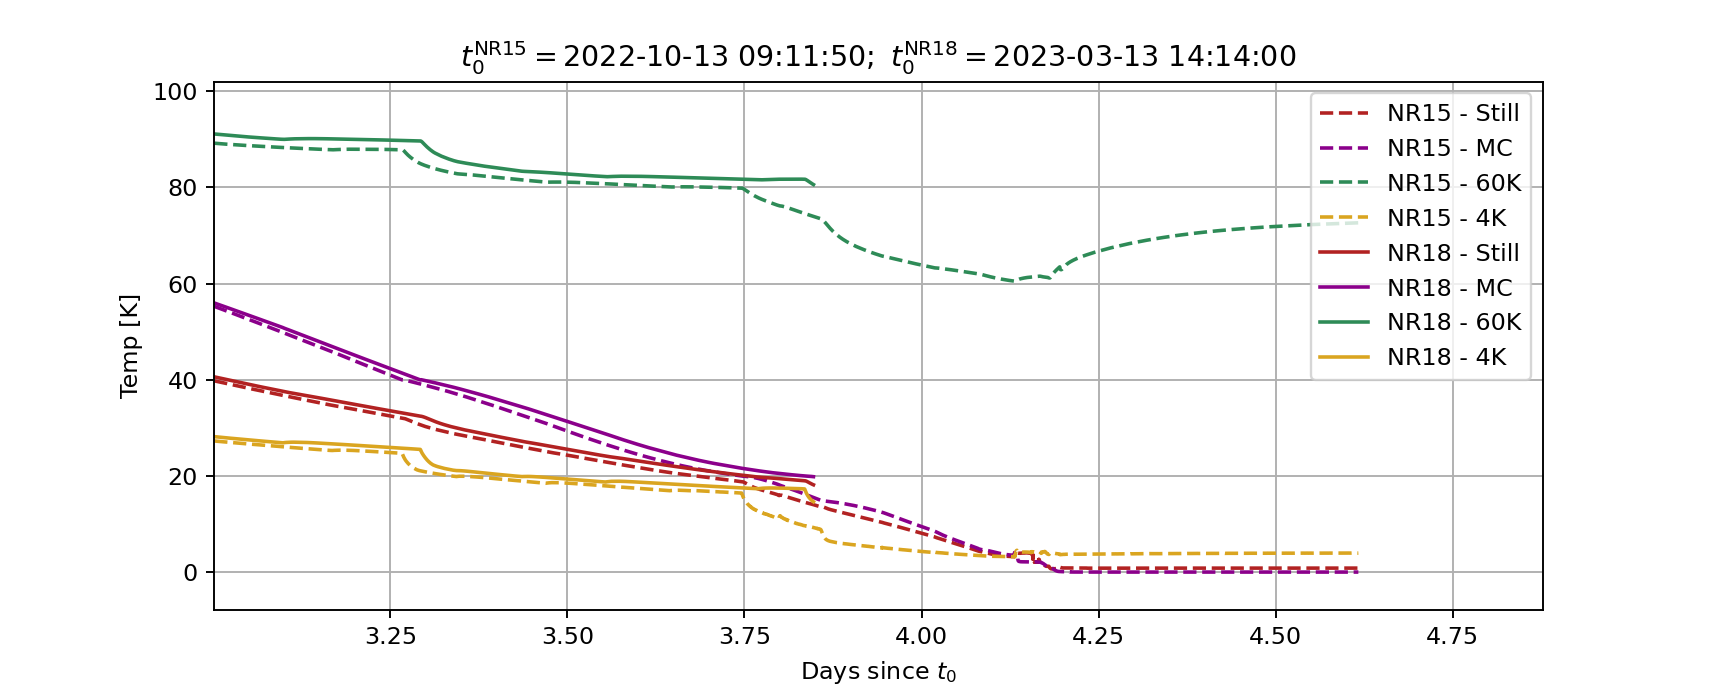

In [9]:
%matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Temp [K]')
# a.set_title(r"$t_0^\mathrm{NR17}=$"+str(NR17_t0)+r"$;~t_0^\mathrm{NR18}=$"+str(NR18_t0))
a.set_title(r"$t_0^\mathrm{NR15}=$"+str(NR15_t0)+r"$;~t_0^\mathrm{NR18}=$"+str(NR18_t0))

ls_NR17 = "--"
ls_NR18 = "-"

c_CP = 'dodgerblue'
c_St = 'firebrick'
c_MC = 'darkmagenta'
c_1S = 'seagreen'
c_2S = 'goldenrod'

## Plot the PLC temperature data for Run 17
# a.plot(NR15_time_plc, data_plc_NR15['RuO2 CP']    , label='NR15 - CP'   , color=c_CP, ls=ls_NR17)
a.plot(NR15_time_plc, data_plc_NR15['Still Stage'], label='NR15 - Still', color=c_St, ls=ls_NR17)
a.plot(NR15_time_plc, data_plc_NR15['FR MC']      , label='NR15 - MC'   , color=c_MC, ls=ls_NR17)
a.plot(NR15_time_plc, data_plc_NR15['1srt Stage'] , label='NR15 - 60K'  , color=c_1S, ls=ls_NR17)
a.plot(NR15_time_plc, data_plc_NR15['2nd Stage']  , label='NR15 - 4K'   , color=c_2S, ls=ls_NR17)

# ## Plot the PLC temperature data for Run 17
# # a.plot(NR17_time_plc, data_plc_NR17['RuO2 CP']    , label='NR17 - CP'   , color=c_CP, ls=ls_NR17)
# a.plot(NR17_time_plc, data_plc_NR17['Still Stage'], label='NR17 - Still', color=c_St, ls=ls_NR17)
# a.plot(NR17_time_plc, data_plc_NR17['FR MC']      , label='NR17 - MC'   , color=c_MC, ls=ls_NR17)
# a.plot(NR17_time_plc, data_plc_NR17['1srt Stage'] , label='NR17 - 60K'  , color=c_1S, ls=ls_NR17)
# a.plot(NR17_time_plc, data_plc_NR17['2nd Stage']  , label='NR17 - 4K'   , color=c_2S, ls=ls_NR17)

## Plot the PLC temperature data for Run 18
# a.plot(NR18_time_plc, data_plc_NR18['RuO2 CP']    , label='NR18 - CP'   , color=c_CP, ls=ls_NR18)
a.plot(NR18_time_plc, data_plc_NR18['Still Stage'], label='NR18 - Still', color=c_St, ls=ls_NR18)
a.plot(NR18_time_plc, data_plc_NR18['FR MC']      , label='NR18 - MC'   , color=c_MC, ls=ls_NR18)
a.plot(NR18_time_plc, data_plc_NR18['1srt Stage'] , label='NR18 - 60K'  , color=c_1S, ls=ls_NR18)
a.plot(NR18_time_plc, data_plc_NR18['2nd Stage']  , label='NR18 - 4K'   , color=c_2S, ls=ls_NR18)

plt.grid()
plt.legend(loc="best")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)

<IPython.core.display.Javascript object>


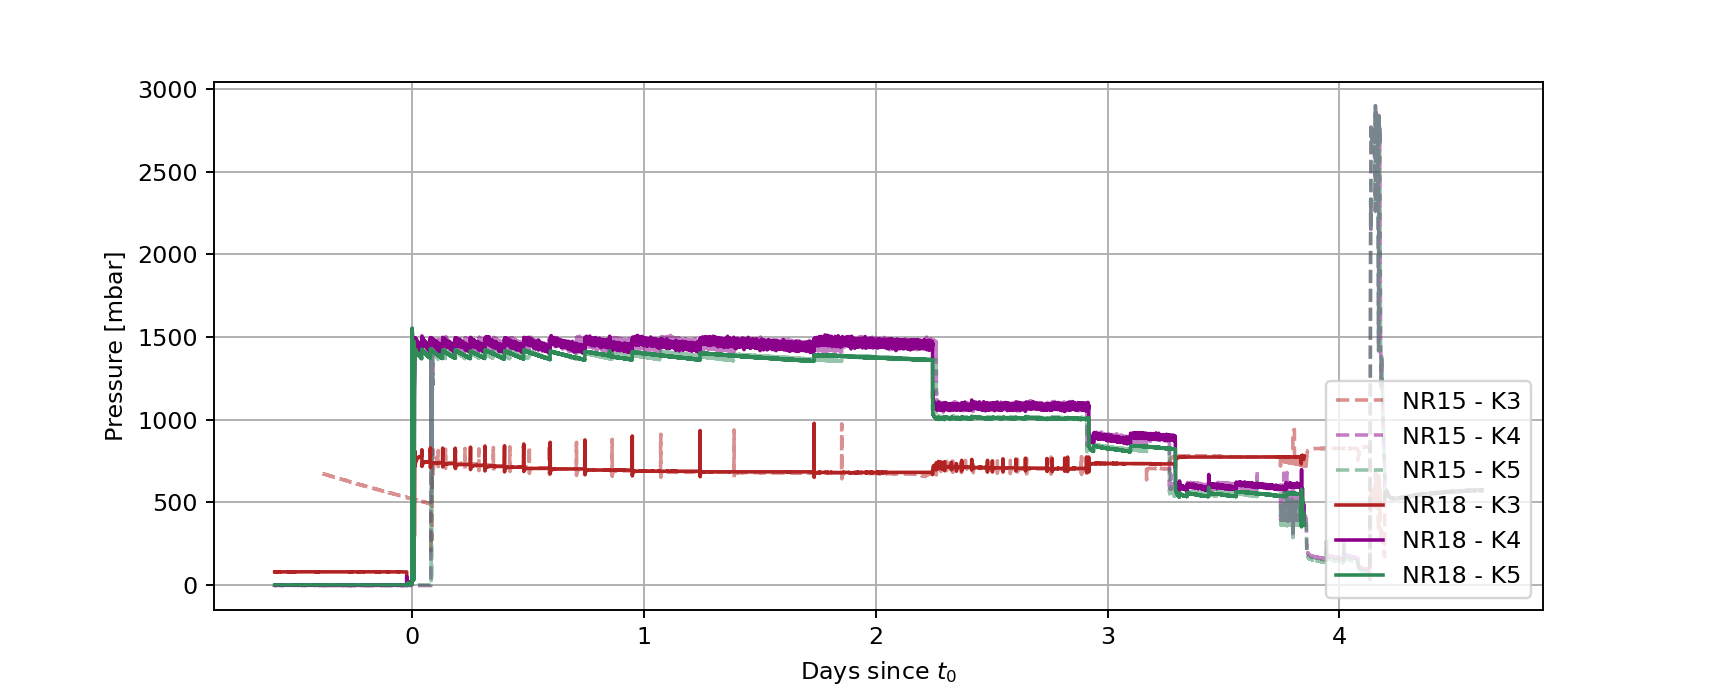

In [10]:
# %matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Pressure [mbar]')

c_P1 = 'dodgerblue'
c_K3 = 'firebrick'
c_K4 = 'darkmagenta'
c_K5 = 'seagreen'
c_K6 = 'goldenrod'
c_P2 = 'darkgrey'
c_P3 = 'olivedrab'

# ## Plot the PLC data for Run 15
# a.plot(NR15_time_plc, data_plc_NR15['P1 mbar'], label='NR15 - P1', color=c_P1, ls=ls_NR17, alpha=0.5)
a.plot(NR15_time_plc, data_plc_NR15['K3 mbar'], label='NR15 - K3', color=c_K3, ls=ls_NR17, alpha=0.5)
a.plot(NR15_time_plc, data_plc_NR15['K4 mbar'], label='NR15 - K4', color=c_K4, ls=ls_NR17, alpha=0.5)
a.plot(NR15_time_plc, data_plc_NR15['K5 mbar'], label='NR15 - K5', color=c_K5, ls=ls_NR17, alpha=0.5)
# a.plot(NR15_time_plc, data_plc_NR15['K6 mbar'], label='NR15 - K6', color=c_K6, ls=ls_NR17, alpha=0.5)
# a.plot(NR15_time_plc, data_plc_NR15['P2 mbar'], label='NR15 - P2', color=c_P2, ls=ls_NR17, alpha=0.5)
# a.plot(NR15_time_plc, data_plc_NR15['P3 mbar'], label='NR15 - P3', color=c_P3, ls=ls_NR17, alpha=0.5)

# ## Plot the PLC data for Run 18
# a.plot(NR18_time_plc, data_plc_NR18['P1 mbar'], label='NR18 - P1', color=c_P1, ls=ls_NR18)
a.plot(NR18_time_plc, data_plc_NR18['K3 mbar'], label='NR18 - K3', color=c_K3, ls=ls_NR18)
a.plot(NR18_time_plc, data_plc_NR18['K4 mbar'], label='NR18 - K4', color=c_K4, ls=ls_NR18)
a.plot(NR18_time_plc, data_plc_NR18['K5 mbar'], label='NR18 - K5', color=c_K5, ls=ls_NR18)
# a.plot(NR18_time_plc, data_plc_NR18['K6 mbar'], label='NR18 - K6', color=c_K6, ls=ls_NR18)
# a.plot(NR18_time_plc, data_plc_NR18['P2 mbar'], label='NR18 - P2', color=c_P2, ls=ls_NR18)
# a.plot(NR18_time_plc, data_plc_NR18['P3 mbar'], label='NR18 - P3', color=c_P3, ls=ls_NR18)

# a.set_yscale('log')

plt.grid()
plt.legend(loc="lower right")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)

<IPython.core.display.Javascript object>


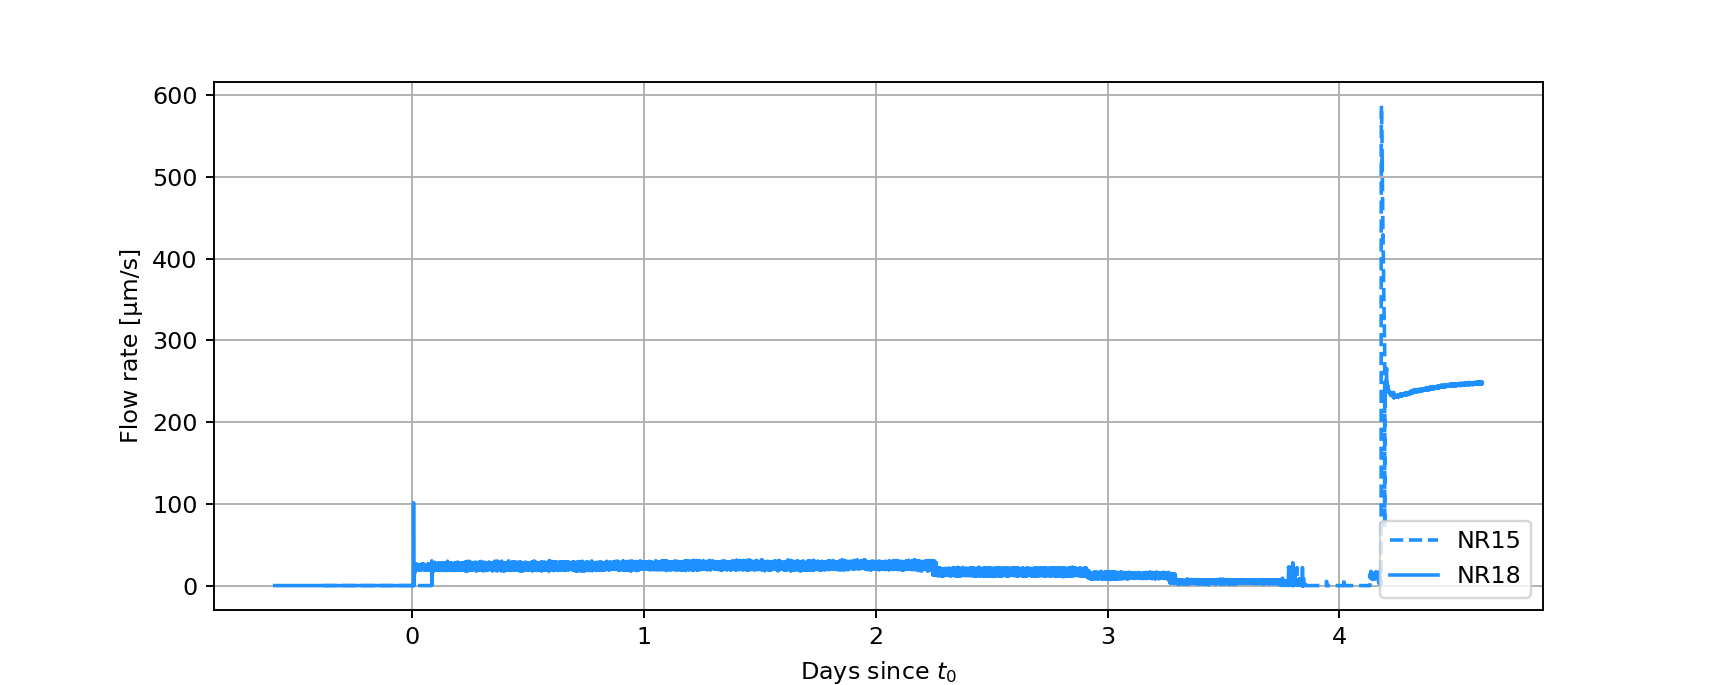

In [11]:
# %matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Flow rate [µm/s]')

c_FR = 'dodgerblue'

# ## Plot the PLC data for Run 15
a.plot(NR15_time_plc, data_plc_NR15[data_plc_NR15.keys()[8]], label='NR15', color=c_FR, ls=ls_NR17)

# ## Plot the PLC data for Run 18
a.plot(NR18_time_plc, data_plc_NR18[data_plc_NR18.keys()[8]], label='NR18', color=c_FR, ls=ls_NR18)

# a.set_yscale('log')

plt.grid()
plt.legend(loc="lower right")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)